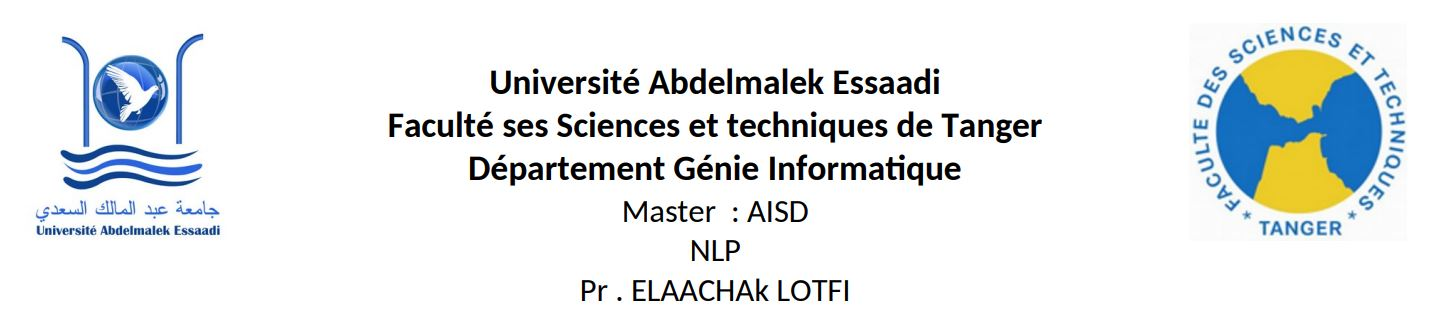

## LAB 1 .

## Objective : The main purpose behind this lab is to get familiar with Scraping and NLP Pipeline.

## Author: AACHABI Mohammed - MST IASD

In [3]:
import requests
from bs4 import BeautifulSoup
# Making a GET request
r = requests.get('https://ar.wikipedia.org/wiki/%D9%82%D8%A7%D8%A6%D9%85%D8%A9_%D8%A7%D9%84%D8%A8%D9%84%D8%AF%D8%A7%D9%86_%D9%88%D8%A7%D9%84%D8%AA%D8%A8%D8%B9%D9%8A%D8%A7%D8%AA_%D8%AD%D8%B3%D8%A8_%D8%B9%D8%AF%D8%AF_%D8%A7%D9%84%D8%B3%D9%83%D8%A7%D9%86')

# check status code for response received
# success code - 200
print(r)

<Response [200]>


In [4]:
soup = BeautifulSoup(r.content, 'html.parser')

In [5]:
table=soup.find("table", class_='wikitable sortable')

In [6]:
world_title=table.find_all('th')

In [7]:
wrold_title_table=[title.text.strip() for title in world_title]

In [8]:
print(wrold_title_table)

['الترتيب', 'البلد(أو إقليم تابع)', 'عدد السكان', 'تاريخ الإحصائية', 'نسبة السكان منالعالم', 'المصدر']


In [9]:
import pandas as pd 
df=pd.DataFrame(columns=wrold_title_table)

In [10]:
df

,الترتيب,البلد(أو إقليم تابع),عدد السكان,تاريخ الإحصائية,نسبة السكان منالعالم,المصدر


In [11]:
column_data = table.find_all('tr')

In [13]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data=[data.text.strip() for data in row_data]
    
    length = len (df)
    df.loc[length]=individual_row_data

In [14]:
df

,الترتيب,البلد(أو إقليم تابع),عدد السكان,تاريخ الإحصائية,نسبة السكان منالعالم,المصدر
0,1,الصين[ملاحظة 1],1٬429٬140٬000,7 أبريل، 2024,17.6%,العداد الرسمي للسكان
1,2,الهند,1٬428٬020٬000,7 أبريل، 2024,17.6%,العداد الرسمي للسكان
2,3,الولايات المتحدة[ملاحظة 2],335٬253٬000,7 أبريل، 2024,4.13%,العداد الرسمي للسكان
3,4,إندونيسيا,266،911،900,,3.29%,الإسقاط السنوي الرسمي
4,5,البرازيل,219٬911٬000,7 أبريل، 2024,2.71%,العداد الرسمي للسكان
...,...,...,...,...,...,...
235,–,نييوي (نيوزيلندا),1،520,1 يوليو، 2018,0.000019%,التقدير السنوي الرسمي
236,–,توكيلاو (نيوزيلندا),1،400,1 يوليو، 2018,0.000017%,التقدير السنوي الرسمي
237,194,الفاتيكان,799,1 يوليو، 2019,0.000010%,إسقاط الأمم المتحدة
238,–,جزر كوكوس (أستراليا),538,30 يونيو، 2018,0.0000066%,التقدير الرسمي


In [20]:
df.to_csv('countries.csv',index=False)

In [23]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient('localhost', 27017)
db = client['test']
collection = db['country_population']


In [24]:
# Convert DataFrame to dictionary for MongoDB insertion
data_dict = df.to_dict(orient='records')

# Insert data into MongoDB
collection.insert_many(data_dict)

print("Data inserted into MongoDB successfully!")

Data inserted into MongoDB successfully!


In [25]:
data_dict

[{'الترتيب': '1',
  'البلد(أو إقليم تابع)': 'الصين[ملاحظة 1]',
  'عدد السكان': '1٬429٬140٬000',
  'تاريخ الإحصائية': '7 أبريل، 2024',
  'نسبة السكان منالعالم': '17.6%',
  'المصدر': 'العداد الرسمي للسكان',
  '_id': ObjectId('66123ca3dfb5cc4b2de78a43')},
 {'الترتيب': '2',
  'البلد(أو إقليم تابع)': 'الهند',
  'عدد السكان': '1٬428٬020٬000',
  'تاريخ الإحصائية': '7 أبريل، 2024',
  'نسبة السكان منالعالم': '17.6%',
  'المصدر': 'العداد الرسمي للسكان',
  '_id': ObjectId('66123ca3dfb5cc4b2de78a44')},
 {'الترتيب': '3',
  'البلد(أو إقليم تابع)': 'الولايات المتحدة[ملاحظة 2]',
  'عدد السكان': '335٬253٬000',
  'تاريخ الإحصائية': '7 أبريل، 2024',
  'نسبة السكان منالعالم': '4.13%',
  'المصدر': 'العداد الرسمي للسكان',
  '_id': ObjectId('66123ca3dfb5cc4b2de78a45')},
 {'الترتيب': '4',
  'البلد(أو إقليم تابع)': 'إندونيسيا',
  'عدد السكان': '266،911،900',
  'تاريخ الإحصائية': '',
  'نسبة السكان منالعالم': '3.29%',
  'المصدر': 'الإسقاط السنوي الرسمي',
  '_id': ObjectId('66123ca3dfb5cc4b2de78a46')},
 {'الترتي

In [44]:
def convert_to_text(data_dict):
    text = ""
    for item in data_dict:
        for key, value in item.items():
            text += f"{key}: {value}\n"
        text += "\n"  
    return text

In [45]:
result_text = convert_to_text(data_dict)
print(result_text)

الترتيب: 1
البلد(أو إقليم تابع): الصينملاحظة 1
عدد السكان: 1٬429٬140٬000
تاريخ الإحصائية: 7 أبريل، 2024
نسبة السكان منالعالم: 176
المصدر: العداد الرسمي للسكان
_id: 66123ca3dfb5cc4b2de78a43

الترتيب: 2
البلد(أو إقليم تابع): الهند
عدد السكان: 1٬428٬020٬000
تاريخ الإحصائية: 7 أبريل، 2024
نسبة السكان منالعالم: 176
المصدر: العداد الرسمي للسكان
_id: 66123ca3dfb5cc4b2de78a44

الترتيب: 3
البلد(أو إقليم تابع): الولايات المتحدةملاحظة 2
عدد السكان: 335٬253٬000
تاريخ الإحصائية: 7 أبريل، 2024
نسبة السكان منالعالم: 413
المصدر: العداد الرسمي للسكان
_id: 66123ca3dfb5cc4b2de78a45

الترتيب: 4
البلد(أو إقليم تابع): إندونيسيا
عدد السكان: 266،911،900
تاريخ الإحصائية: 
نسبة السكان منالعالم: 329
المصدر: الإسقاط السنوي الرسمي
_id: 66123ca3dfb5cc4b2de78a46

الترتيب: 5
البلد(أو إقليم تابع): البرازيل
عدد السكان: 219٬911٬000
تاريخ الإحصائية: 7 أبريل، 2024
نسبة السكان منالعالم: 271
المصدر: العداد الرسمي للسكان
_id: 66123ca3dfb5cc4b2de78a47

الترتيب: 6
البلد(أو إقليم تابع): باكستان
عدد السكان: 219٬498٬000
تاريخ الإ

In [51]:
!pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 217.9 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.0 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 184.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 653.6 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.5 MB 544.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 722.1 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.5 MB 807.1 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 860.2 kB/s eta 0:00:02
   ------- ----

In [68]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from pymongo import MongoClient

# Load NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [53]:
def text_preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s\u0600-\u06FF]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('arabic'))  # assuming Arabic text
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming (optional)
    stemmer = SnowballStemmer('arabic')  # for Arabic language
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Join tokens back into text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [54]:
clen= text_preprocessing(result_text)

In [55]:
clen

'ترتيب 1 بلداو اقليم تابع صينملاحظ 1 عدد السك 1٬429٬140٬000 تاريخ احصاء 7 ابريل 2024 نسب السك منالعالم 176 مصدر عداد رسم للسك _id 66123ca3dfb5cc4b2de78a43 ترتيب 2 بلداو اقليم تابع هند عدد السك 1٬428٬020٬000 تاريخ احصاء 7 ابريل 2024 نسب السك منالعالم 176 مصدر عداد رسم للسك _id 66123ca3dfb5cc4b2de78a44 ترتيب 3 بلداو اقليم تابع ولا متحدةملاحظ 2 عدد السك 335٬253٬000 تاريخ احصاء 7 ابريل 2024 نسب السك منالعالم 413 مصدر عداد رسم للسك _id 66123ca3dfb5cc4b2de78a45 ترتيب 4 بلداو اقليم تابع اندونيس عدد السك 266911900 تاريخ احصاء نسب السك منالعالم 329 مصدر اسقاط سنو رسم _id 66123ca3dfb5cc4b2de78a46 ترتيب 5 بلداو اقليم تابع برازيل عدد السك 219٬911٬000 تاريخ احصاء 7 ابريل 2024 نسب السك منالعالم 271 مصدر عداد رسم للسك _id 66123ca3dfb5cc4b2de78a47 ترتيب 6 بلداو اقليم تابع اكست عدد السك 219٬498٬000 تاريخ احصاء 7 ابريل 2024 نسب السك منالعالم 271 مصدر عداد رسم للسك _id 66123ca3dfb5cc4b2de78a48 ترتيب 7 بلداو اقليم تابع نيجير عدد السك 206139589 تاريخ احصاء 1 يون 2022 نسب السك منالعالم 248 مصدر عداد رسم للس

In [56]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [57]:
# Tokenize the sentence
tokens = word_tokenize(result_text)

In [58]:

# Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in tokens]

In [61]:

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

In [64]:

print("Original text : \n", result_text)


Original text 
: الترتيب: 1
البلد(أو إقليم تابع): الصينملاحظة 1
عدد السكان: 1٬429٬140٬000
تاريخ الإحصائية: 7 أبريل، 2024
نسبة السكان منالعالم: 176
المصدر: العداد الرسمي للسكان
_id: 66123ca3dfb5cc4b2de78a43

الترتيب: 2
البلد(أو إقليم تابع): الهند
عدد السكان: 1٬428٬020٬000
تاريخ الإحصائية: 7 أبريل، 2024
نسبة السكان منالعالم: 176
المصدر: العداد الرسمي للسكان
_id: 66123ca3dfb5cc4b2de78a44

الترتيب: 3
البلد(أو إقليم تابع): الولايات المتحدةملاحظة 2
عدد السكان: 335٬253٬000
تاريخ الإحصائية: 7 أبريل، 2024
نسبة السكان منالعالم: 413
المصدر: العداد الرسمي للسكان
_id: 66123ca3dfb5cc4b2de78a45

الترتيب: 4
البلد(أو إقليم تابع): إندونيسيا
عدد السكان: 266،911،900
تاريخ الإحصائية: 
نسبة السكان منالعالم: 329
المصدر: الإسقاط السنوي الرسمي
_id: 66123ca3dfb5cc4b2de78a46

الترتيب: 5
البلد(أو إقليم تابع): البرازيل
عدد السكان: 219٬911٬000
تاريخ الإحصائية: 7 أبريل، 2024
نسبة السكان منالعالم: 271
المصدر: العداد الرسمي للسكان
_id: 66123ca3dfb5cc4b2de78a47

الترتيب: 6
البلد(أو إقليم تابع): باكستان
عدد السكان: 219٬

In [65]:
print("Stemmed Words: \n", stemmed_words)


Stemmed Words: 
 ['الترتيب', ':', '1', 'البلد', '(', 'أو', 'إقليم', 'تابع', ')', ':', 'الصينملاحظة', '1', 'عدد', 'السكان', ':', '1٬429٬140٬000', 'تاريخ', 'الإحصائية', ':', '7', 'أبريل،', '2024', 'نسبة', 'السكان', 'منالعالم', ':', '176', 'المصدر', ':', 'العداد', 'الرسمي', 'للسكان', '_id', ':', '66123ca3dfb5cc4b2de78a43', 'الترتيب', ':', '2', 'البلد', '(', 'أو', 'إقليم', 'تابع', ')', ':', 'الهند', 'عدد', 'السكان', ':', '1٬428٬020٬000', 'تاريخ', 'الإحصائية', ':', '7', 'أبريل،', '2024', 'نسبة', 'السكان', 'منالعالم', ':', '176', 'المصدر', ':', 'العداد', 'الرسمي', 'للسكان', '_id', ':', '66123ca3dfb5cc4b2de78a44', 'الترتيب', ':', '3', 'البلد', '(', 'أو', 'إقليم', 'تابع', ')', ':', 'الولايات', 'المتحدةملاحظة', '2', 'عدد', 'السكان', ':', '335٬253٬000', 'تاريخ', 'الإحصائية', ':', '7', 'أبريل،', '2024', 'نسبة', 'السكان', 'منالعالم', ':', '413', 'المصدر', ':', 'العداد', 'الرسمي', 'للسكان', '_id', ':', '66123ca3dfb5cc4b2de78a45', 'الترتيب', ':', '4', 'البلد', '(', 'أو', 'إقليم', 'تابع', ')', ':', '

In [66]:
print("Lemmatized Words: \n", lemmatized_words)

Lemmatized Words: 
 ['الترتيب', ':', '1', 'البلد', '(', 'أو', 'إقليم', 'تابع', ')', ':', 'الصينملاحظة', '1', 'عدد', 'السكان', ':', '1٬429٬140٬000', 'تاريخ', 'الإحصائية', ':', '7', 'أبريل،', '2024', 'نسبة', 'السكان', 'منالعالم', ':', '176', 'المصدر', ':', 'العداد', 'الرسمي', 'للسكان', '_id', ':', '66123ca3dfb5cc4b2de78a43', 'الترتيب', ':', '2', 'البلد', '(', 'أو', 'إقليم', 'تابع', ')', ':', 'الهند', 'عدد', 'السكان', ':', '1٬428٬020٬000', 'تاريخ', 'الإحصائية', ':', '7', 'أبريل،', '2024', 'نسبة', 'السكان', 'منالعالم', ':', '176', 'المصدر', ':', 'العداد', 'الرسمي', 'للسكان', '_id', ':', '66123ca3dfb5cc4b2de78a44', 'الترتيب', ':', '3', 'البلد', '(', 'أو', 'إقليم', 'تابع', ')', ':', 'الولايات', 'المتحدةملاحظة', '2', 'عدد', 'السكان', ':', '335٬253٬000', 'تاريخ', 'الإحصائية', ':', '7', 'أبريل،', '2024', 'نسبة', 'السكان', 'منالعالم', ':', '413', 'المصدر', ':', 'العداد', 'الرسمي', 'للسكان', '_id', ':', '66123ca3dfb5cc4b2de78a45', 'الترتيب', ':', '4', 'البلد', '(', 'أو', 'إقليم', 'تابع', ')', ':'

In [71]:
pos_tags = nltk.pos_tag(lemmatized_words)

print("Rule-based POS Tags:\n", pos_tags)


Rule-based POS Tags:
 [('الترتيب', 'NN'), (':', ':'), ('1', 'CD'), ('البلد', 'NN'), ('(', '('), ('أو', 'JJ'), ('إقليم', 'NNP'), ('تابع', 'NN'), (')', ')'), (':', ':'), ('الصينملاحظة', '$'), ('1', 'CD'), ('عدد', 'JJ'), ('السكان', 'NN'), (':', ':'), ('1٬429٬140٬000', 'CD'), ('تاريخ', 'JJ'), ('الإحصائية', 'NN'), (':', ':'), ('7', 'CD'), ('أبريل،', 'NN'), ('2024', 'CD'), ('نسبة', 'NNP'), ('السكان', 'NNP'), ('منالعالم', 'NN'), (':', ':'), ('176', 'CD'), ('المصدر', 'NN'), (':', ':'), ('العداد', 'JJ'), ('الرسمي', 'NNP'), ('للسكان', 'NNP'), ('_id', 'NN'), (':', ':'), ('66123ca3dfb5cc4b2de78a43', 'CD'), ('الترتيب', 'NN'), (':', ':'), ('2', 'CD'), ('البلد', 'NN'), ('(', '('), ('أو', 'JJ'), ('إقليم', 'NNP'), ('تابع', 'NN'), (')', ')'), (':', ':'), ('الهند', 'JJ'), ('عدد', 'JJ'), ('السكان', 'NN'), (':', ':'), ('1٬428٬020٬000', 'CD'), ('تاريخ', 'JJ'), ('الإحصائية', 'NN'), (':', ':'), ('7', 'CD'), ('أبريل،', 'NN'), ('2024', 'CD'), ('نسبة', 'NNP'), ('السكان', 'NNP'), ('منالعالم', 'NN'), (':', ':'), (

In [73]:
!pip install spacy

     ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
     ------------------- -------------------- 41.0/85.1 kB 2.0 MB/s eta 0:00:01
     ------------------- -------------------- 41.0/85.1 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 85.1/85.1 kB 686.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.7 MB 3.2 MB/s eta 0:00:04
   ---------------------------------------- 0.1/11.7 MB 3.2 MB/s eta 0:00:04
    --------------------------------------- 0.2/11.7 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.7 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/11.7 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.5/11.7 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/11.7 MB 1.8 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.7 MB 2.7 MB/s eta 0:00:04
  

In [80]:
import spacy

# Load spaCy's Arabic language model
nlp = spacy.load("xx_ent_wiki_sm")  # Arabic language model

# Apply spaCy's NER
doc = nlp(result_text)

print("Named Entities (spaCy - Arabic):")
for entity in doc.ents:
    print(entity.text, entity.label_)


Named Entities (spaCy - Arabic):
نتيجة التعداد PER
نتيجة تعداد 2018 MISC
66123ca3dfb5cc4b2de78a67 MISC
نتيجة تعداد 2019 MISC
id: 66123ca3dfb5cc4b2de78a76 MISC
23،593،794 PER
نتيجة تعداد 2018 MISC
نتيجة التعداد PER
نتائج التعداد MISC
66123ca3dfb5cc4b2de78a96 MISC
66123ca3dfb5cc4b2de78aa4 MISC
66123ca3dfb5cc4b2de78ac6 MISC
نتيجة تعداد MISC
66123ca3dfb5cc4b2de78af6 MISC
201،784 PER
66123ca3dfb5cc4b2de78b03 MISC
نتيجة تعداد MISC
id: 66123ca3dfb5cc4b2de78b09 MISC
97،625 MISC
96،453 MISC
83،314 MISC
نتيجة تعداد MISC
76،177 MISC
71،808 MISC
65،813 MISC
64،027 MISC
62،754 MISC
56،700 MISC
56،200 MISC
56،225 MISC
55،500 MISC
53،532 MISC
نتيجة التعداد PER
52،823 MISC
52،122 MISC
41،369 MISC
40،614 MISC
38،380 MISC
38،300 MISC
35،746 MISC
33،701 MISC
33،524 MISC
30،030 MISC
11،700 MISC
نتيجة تعداد MISC
نتيجة تعداد MISC


## brief synthesis

## from this lab, you can learn several things:

* ## Web Scraping

I learned how to extract data from web sources using Python libraries like Scrapy and BeautifulSoup. This includes making HTTP requests, parsing HTML content, and extracting relevant information from web pages, espacially when it comes to something challenges like arabci websites 

* ## Data Extraction and Storage

I learned how to extract structured data from web pages and store it in a structured format such as csv or a database (e.g., MongoDB). This involves understanding the structure of the data on the web page and designing appropriate methods for extraction and storage.

* ## Text Preprocessing

i learned about various text preprocessing techniques such as cleaning, tokenization, stop words removal, stemming, and lemmatization. 
additionaly i had the chance to compare between Stemming and Lemmatization lemmacons or dictionaries.

* Stemming 
* Stemming reduces words to their base or root form by removing suffixes.

* It's a rule-based approach and operates by chopping off the end of words.
* Stemmed words may not always be real words, as the process can result in stems that are not valid in the language.

* Lemmatization:

- Lemmatization reduces words to their base or dictionary form, known as the lemma.

- It considers the morphological analysis of the word, including its context in the sentence.
- Lemmatization typically requires access to a lexicon or dictionary to accurately determine the lemma of a word.

* ## Named Entity Recognition (NER)

 i learned about NER, a fundamental task in NLP, one of the most popular data preprocessing task. It involves the identification of key information in the text and classification into a set of predefined
categories. An entity is basically the thing that is consistently talked about or refer to in the text.Iu explorde both rule-based and machine learning-based approaches for NER and how to apply them using Python libraries like NLTK and spaC y.

* ## Conclusion

in conclusion this lab has provided me with a foundation in web scraping and NLP, equipping me with the knowledge and skills to extract and preprocess data from web sources and build NLP pipelines for text analysis and understanding.